In [123]:
# pip install nltk

In [124]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
nltk.corpus.gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [125]:
aiw = nltk.corpus.gutenberg.raw("milton-paradise.txt")
word_tokens = word_tokenize(aiw.lower())
word_tokens

['[',
 'paradise',
 'lost',
 'by',
 'john',
 'milton',
 '1667',
 ']',
 'book',
 'i',
 'of',
 'man',
 "'s",
 'first',
 'disobedience',
 ',',
 'and',
 'the',
 'fruit',
 'of',
 'that',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'brought',
 'death',
 'into',
 'the',
 'world',
 ',',
 'and',
 'all',
 'our',
 'woe',
 ',',
 'with',
 'loss',
 'of',
 'eden',
 ',',
 'till',
 'one',
 'greater',
 'man',
 'restore',
 'us',
 ',',
 'and',
 'regain',
 'the',
 'blissful',
 'seat',
 ',',
 'sing',
 ',',
 'heavenly',
 'muse',
 ',',
 'that',
 ',',
 'on',
 'the',
 'secret',
 'top',
 'of',
 'oreb',
 ',',
 'or',
 'of',
 'sinai',
 ',',
 'didst',
 'inspire',
 'that',
 'shepherd',
 'who',
 'first',
 'taught',
 'the',
 'chosen',
 'seed',
 'in',
 'the',
 'beginning',
 'how',
 'the',
 'heavens',
 'and',
 'earth',
 'rose',
 'out',
 'of',
 'chaos',
 ':',
 'or',
 ',',
 'if',
 'sion',
 'hill',
 'delight',
 'thee',
 'more',
 ',',
 'and',
 'siloa',
 "'s",
 'brook',
 'that',
 'flowed',
 'fast',
 'by',
 'the',
 

In [126]:
sw = set(nltk.corpus.stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [127]:
# nltk.download('punkt')
# nltk.download('punkt_tab')

In [128]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in word_tokens if word.isalpha() and word not in sw]
print(words)

['paradise', 'lost', 'john', 'milton', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'till', 'one', 'greater', 'man', 'restore', 'u', 'regain', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'secret', 'top', 'oreb', 'sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heaven', 'earth', 'rose', 'chaos', 'sion', 'hill', 'delight', 'thee', 'siloa', 'brook', 'flowed', 'fast', 'oracle', 'god', 'thence', 'invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'aonian', 'mount', 'pursues', 'thing', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'thou', 'spirit', 'dost', 'prefer', 'temple', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'thou', 'first', 'wast', 'present', 'mighty', 'wing', 'outspread', 'brooding', 'vast', 'abyss', 'pregnant', 'dark', 'illumine', 'low', 'raise', 'support', 'height', 'great'

In [129]:
word_count = Counter(words)
top_words = word_count.most_common(20)
print(top_words)

[('thou', 432), ('heaven', 425), ('thy', 412), ('thee', 358), ('thus', 318), ('god', 307), ('shall', 283), ('yet', 228), ('though', 217), ('earth', 215), ('u', 187), ('man', 174), ('first', 169), ('day', 151), ('high', 149), ('one', 141), ('son', 132), ('far', 128), ('death', 127), ('may', 126)]


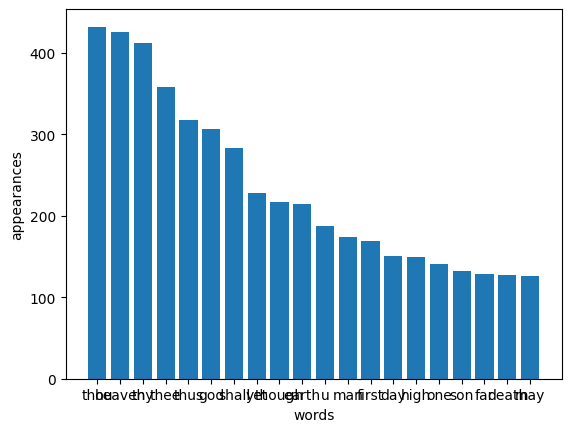

<Figure size 3000x600 with 0 Axes>

In [130]:
words, count = zip(*top_words)
plt.bar(words, count)
plt.xlabel('words')
plt.ylabel('appearances')
plt.figure(figsize=(30,6))
plt.show()

I chose lemmatization because it considers contexts and converts words to their original meaning. It is more accurate than stemming.

In [131]:
#nltk.download('vader_lexicon')

In [132]:
analyzer = SentimentIntensityAnalyzer()
text = sent_tokenize(aiw)

In [133]:
sentiment = [(sentence, analyzer.polarity_scores(sentence)) for sentence in text]
print(sentiment)

[("[Paradise Lost by John Milton 1667] \n \n \nBook I \n \n \nOf Man's first disobedience, and the fruit \nOf that forbidden tree whose mortal taste \nBrought death into the World, and all our woe, \nWith loss of Eden, till one greater Man \nRestore us, and regain the blissful seat, \nSing, Heavenly Muse, that, on the secret top \nOf Oreb, or of Sinai, didst inspire \nThat shepherd who first taught the chosen seed \nIn the beginning how the heavens and earth \nRose out of Chaos: or, if Sion hill \nDelight thee more, and Siloa's brook that flowed \nFast by the oracle of God, I thence \nInvoke thy aid to my adventurous song, \nThat with no middle flight intends to soar \nAbove th' Aonian mount, while it pursues \nThings unattempted yet in prose or rhyme.", {'neg': 0.125, 'neu': 0.693, 'pos': 0.182, 'compound': 0.8481}), ("And chiefly thou, O Spirit, that dost prefer \nBefore all temples th' upright heart and pure, \nInstruct me, for thou know'st; thou from the first \nWast present, and, 

In [134]:
positive = sorted(sentiment, key= lambda x: x[1]['pos'], reverse=True)[:5]
neutral = sorted(sentiment, key= lambda x: x[1]['neu'], reverse=True)[:5]
negative = sorted(sentiment, key= lambda x: x[1]['neg'], reverse=True)[:5]

print('most positive sentences:')
for sentence, score in positive:
    print(f"{sentence}\nScore: {score}\n")

most positive sentences:
O friends!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5255}

O Heaven!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5562}

O Friends!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5255}

O Heaven!
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5562}

She fair, divinely fair, fit love for Gods!
Score: {'neg': 0.0, 'neu': 0.162, 'pos': 0.838, 'compound': 0.9381}



In [135]:
print('most neutral sentences:')
for sentence, score in neutral:
    print(f"{sentence}\nScore: {score}\n")

most neutral sentences:
Oh how unlike the place from whence they fell!
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

But see!
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Him, haply slumbering on the Norway foam, 
The pilot of some small night-foundered skiff, 
Deeming some island, oft, as seamen tell, 
With fixed anchor in his scaly rind, 
Moors by his side under the lee, while night 
Invests the sea, and wished morn delays.
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Such resting found the sole 
Of unblest feet.
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Awake, arise, or be for ever fallen!"
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



In [136]:
print('most negative sentences:')
for sentence, score in negative:
    print(f"{sentence}\nScore: {score}\n")

most negative sentences:
No!
Score: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3595}

O Hell!
Score: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7088}

Alas!
Score: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3382}

Me miserable!
Score: {'neg': 0.777, 'neu': 0.223, 'pos': 0.0, 'compound': -0.5411}

Sad cure!
Score: {'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5255}



I think the sentences and their sentiment analysis are accurate, because is based off the score which is a negative, positive, or null number, depending on the words included in the tokenized sentence.

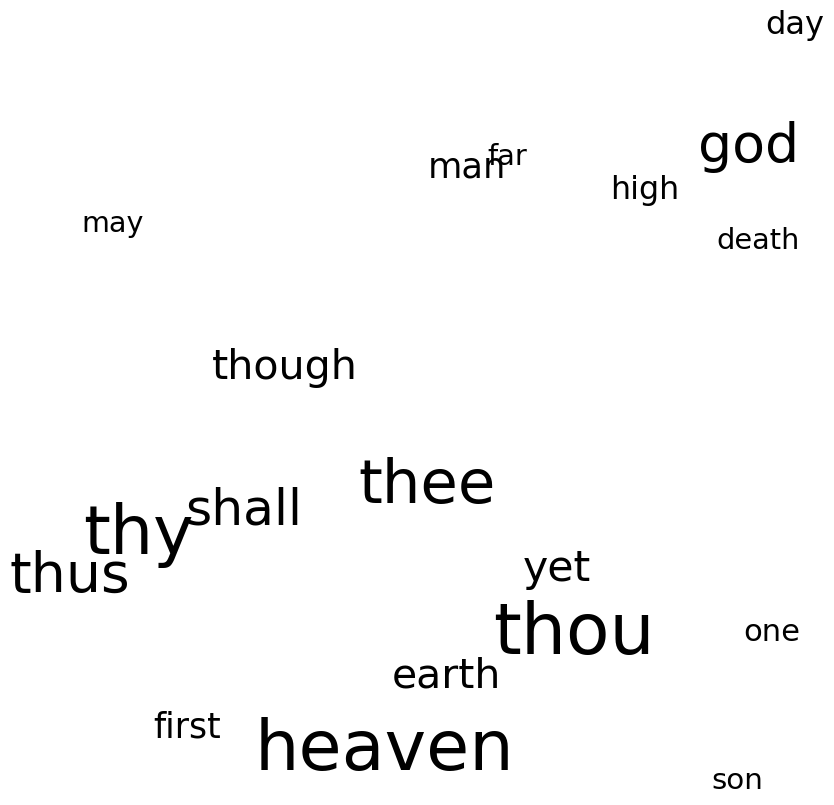

In [144]:
top_20 = ({'thou':432, 'heaven':425, 'thy':412, 'thee': 358, 'thus': 318, 'god': 307, 'shall': 283,
        'yet': 228, 'though': 217, 'earth': 215, 'man': 174, 'first': 169, 'day':151, 
        'high': 149, 'one': 141, 'son': 132, 'far': 128, 'death': 127, 'may': 126
}) 


def text_size(total: int) -> float:
    """"equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20

plt.figure(figsize=(10,5))
#np.random.seed(42)
x_position = np.random.uniform(0,10, len(top_20))
y_position = np.random.uniform(0,10, len(top_20))

for i, (word, count) in enumerate(top_20.items()):
    x.append(i)
    y.append(0)
    plt.text(x_position[i],y_position[i],word, ha='center', va='center',
             size=text_size(count))
    
plt.axis("off")
plt.xlim(0,10)
plt.ylim(0,5)
plt.show()